In [1]:
# Pandas library for the pandas dataframes
import pandas as pd    
import numpy as np

# Import Scikit-Learn library for the classification models
import sklearn
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import classification_report

# Another statistic model library
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import scipy
from scipy import interpolate
from scipy.interpolate import interp1d

# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt

# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 20})

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Import cleaning and splitting functions
from clean_split_data import clean_data
from clean_split_data import split_data

### Data

In [2]:
data = pd.read_csv('data.csv')

In [13]:
data = clean_data(data)
X_train, X_test, y_train, y_test = split_data(data)

### Classifier

In [14]:
clf = SVC(kernel='linear', C=10000)
clf.fit(X_train, y_train)

SVC(C=10000, kernel='linear')

### SVM Linear Prediction with all 10 features

In [15]:
def predict(test_data):
    
    #test_data = pd.DataFrame(test_data).T
    y_pred = clf.predict(test_data)
   
    return y_pred

In [16]:
y_pred = predict(X_test)

In [17]:
'''Accuracy and MSE Using ALL 10 features'''

accuracy_1 = accuracy_score(y_test, y_pred)
print("Prediction accuracy MSE: ", mean_squared_error(y_test, y_pred))
print("Accuracy score", accuracy_score(y_test, y_pred))

Prediction accuracy MSE:  0.043859649122807015
Accuracy score 0.956140350877193


### Backward Stepwise selection Using 1 to 9 features 

In [8]:
'''Load the cleaned original dataset for below use'''
X = data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
y = data.diagnosis

'''A list of for the for-loop'''
n = [1,2,3,4,5,6,7,8,9]

list_MSE=[]
list_AC=[]
list_MSE_1=[]
list_AC_1=[]
selected_features = []

for i in n:
    sbs_backward = SequentialFeatureSelector(SVC(kernel = "linear"), 
                                                 n_features_to_select=i,
                                                 direction='backward').fit(X_train, y_train)
    selected = sbs_backward.get_support(indices=True)
    '''passing the selected features to the orginial dataset for each number of i'''
    f_names = np.array(X.columns)
    x_manip = X[f_names[selected]]
    selected_features.append(f_names[selected])
    
    '''Spliting the original data set with selected feature for each number of i'''
    X_train1, X_test1, y_train1, y_test1 = train_test_split(x_manip, y , test_size=0.2, random_state=42) 
    
    model = SVC(kernel='linear', C=10000)
    model.fit(X_train1, y_train1)

    y_pred1 = model.predict(X_test1)
    y_pred2 = model.predict(X_train1)
    
    list_AC.append(accuracy_score(y_test1, y_pred1))
    list_AC_1.append(accuracy_score(y_train1, y_pred2))
    list_MSE.append(mean_squared_error(y_test1, y_pred1))
    list_MSE_1.append(mean_squared_error(y_train1, y_pred2))

<function matplotlib.pyplot.show(close=None, block=None)>

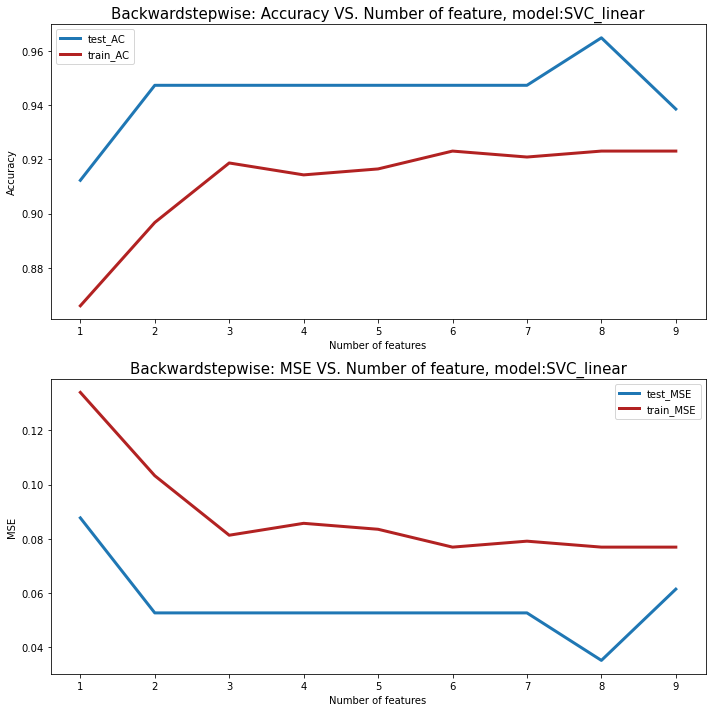

In [9]:
fig,ax = plt.subplots(2,1,figsize=(10,10))
#ax[0].plot(n, list_R2, linewidth=3, alpha=1,label='test_R2')
#ax[0].plot(n, list_R2_1, linewidth=3, alpha=1,c='FireBrick',label='train_R2')
#ax[0].set_title('Backwardstepwise: R2 VS. Number of feature, model:SVC_rbf', fontsize=15)
#ax[0].set_xlabel('Number of features')
#ax[0].set_ylabel('R2')
#ax[0].legend()

ax[0].plot(n, list_AC, linewidth=3 ,alpha=1,label='test_AC')
ax[0].plot(n, list_AC_1, linewidth=3, alpha=1,c='FireBrick',label='train_AC')
ax[0].set_title('Backwardstepwise: Accuracy VS. Number of feature, model:SVC_linear', fontsize=15)
ax[0].set_xlabel('Number of features')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(n, list_MSE, linewidth=3 ,alpha=1,label='test_MSE')
ax[1].plot(n, list_MSE_1, linewidth=3, alpha=1,c='FireBrick',label='train_MSE')
ax[1].set_title('Backwardstepwise: MSE VS. Number of feature, model:SVC_linear', fontsize=15)
ax[1].set_xlabel('Number of features')
ax[1].set_ylabel('MSE')
ax[1].legend()

plt.tight_layout()
plt.show

### Sample Train, Test, Split results

In [18]:
def sample_results():
    ''' 
    Returns the results and confusion matrix of the sample dataset from Breast Cancer Wisconsin Dataset.
    '''
    y_pred = clf.predict(X_test)
    print("Prediction accuracy MSE: ", mean_squared_error(y_test, y_pred))
    print("Mean accuracy on test set", clf.score(X_test, y_test))
    print("The confusion matrix for the sample dataset using a decision tree is displayed below: ")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()
    
    return

Prediction accuracy MSE:  0.043859649122807015
Mean accuracy on test set 0.956140350877193
The confusion matrix for the sample dataset using a decision tree is displayed below: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



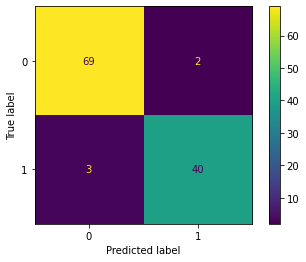

In [19]:
'''This matrix is only for Non-stepwise SVM only'''
sample_results()

Prediction accuracy MSE:  0.06140350877192982
Mean accuracy on test set 0.9385964912280702
The confusion matrix for the sample dataset using a decision tree is displayed below: 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        71
           1       0.89      0.95      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



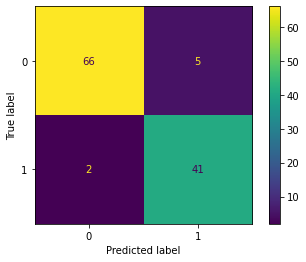

In [20]:
'''This matrix is for Backward Stepwise SVM with 9 features'''
plot_confusion_matrix(model, X_test1, y_test1)
print("Prediction accuracy MSE: ", mean_squared_error(y_test1, y_pred1))
print("Mean accuracy on test set", model.score(X_test1, y_test1))
print("The confusion matrix for the sample dataset using a decision tree is displayed below: ")
print(classification_report(y_test1, y_pred1))

plt.show()

In [21]:
print(list_AC)
print(list_MSE)

[0.9122807017543859, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9385964912280702]
[0.08771929824561403, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.03508771929824561, 0.06140350877192982]


**Based on the above informaiton,  the Best number of parameters for SVM_linear is 10**

###  Optimized SVM_linear Predictor ###

In [24]:
def feature_names():
    '''
    Returns array of input features of best performing backwards stepwise selection test.
    '''
    
    return ['radius_mean', 'texture_mean', 'perimeter_mean',
            'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
            'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

In [25]:
def predict(test_data):
    '''
    Takes test data and uses classifier to predict boolean output.
    '''
    X = data[feature_names()]
    y = data.diagnosis
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    classifier = SVC(kernel='linear', C=10000)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(test_data)
    
    return y_pred